In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [127]:
train_data=pd.read_csv(r'C:\Users\Anmol Gupta\Desktop\Experiments\Projects\Machine Learning\Digit Recognizer\MNIST.csv')

In [128]:
y_train=train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255

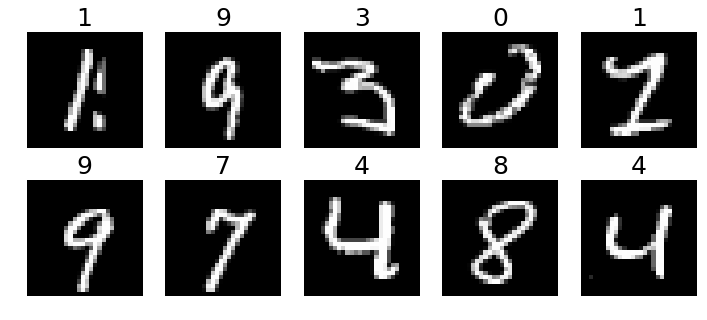

In [133]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [136]:
def ReLu(x):
    x[x<0]=0
    return x

In [139]:
def hypo(X,W,b):
    a1=X
    z1=np.dot(X,W[0])+b[0]
    
    a2=ReLu(z1)
    z2=np.dot(a2, W[1])
    
    s=np.exp(z2)
    total=np.sum(s, axis=1).reshape(-1,1)
    pred=s/total
    
    return pred

In [162]:
def loss(y_pred,y_true):

    global K 
    K = 10
    N = len(y_true)
    
    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot_vec).sum(axis=1)
    # loss_sample is a dimension (N,) array
    # for the final loss, we need take the average
    return -np.mean(loss_sample)

In [163]:
def BackProp(W,b,X,y,alpha=1e-4):
    K = 10
    N = X.shape[0]
    
    
    a1 = X
    
    z1 = np.matmul(X, W[0]) + b[0]
    
    a2 = ReLu(z1)
    
    
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    
    y_one_hot_vec = (y[:,np.newaxis] == np.arange(K))
    error2=sigma-y_one_hot_vec
    delW1=np.dot(a2.T, error2)
    
    error1 = np.matmul(error2, W[1].T)*(z1>0)
    delW0 = np.matmul(X.T, error1)
    
    dW = [delW0/N + alpha*W[0], delW1/N + alpha*W[1]]
    db = [np.mean(error1, axis=0)]
    
    return dW, db
    
    
    

In [164]:
eta = 5e-1
alpha = 1e-6 # regularization
gamma = 0.99 # RMSprop
eps = 1e-3 # RMSprop
num_iter = 2000 # number of iterations of gradient descent
n_H = 256 # number of neurons in the hidden layer
n = X_train.shape[1] # number of pixels in an image
K = 10

In [165]:
# initialization
np.random.seed(1127)
W = [1e-1*np.random.randn(n, n_H), 1e-1*np.random.randn(n_H, K)]
b = [np.random.randn(n_H)]

In [167]:
%%time
gW0 = gW1 = gb0 = 1

for i in range(num_iter):
    dW, db = BackProp(W,b,X_train,y_train,alpha)
    
    gW0 = gamma*gW0 + (1-gamma)*np.sum(dW[0]**2)
    etaW0 = eta/np.sqrt(gW0 + eps)
    W[0] -= etaW0 * dW[0]
    
    gW1 = gamma*gW1 + (1-gamma)*np.sum(dW[1]**2)
    etaW1 = eta/np.sqrt(gW1 + eps)
    W[1] -= etaW1 * dW[1]
    
    gb0 = gamma*gb0 + (1-gamma)*np.sum(db[0]**2)
    etab0 = eta/np.sqrt(gb0 + eps)
    b[0] -= etab0 * db[0]
    
    if i % 500 == 0:
        # sanity check 1
        y_pred = hypo(X_train,W,b)
        print("Cross-entropy loss after", i+1, "iterations is {:.8}".format(
              loss(y_pred,y_train)))
        print("Training accuracy after", i+1, "iterations is {:.4%}".format( 
              np.mean(np.argmax(y_pred, axis=1)== y_train)))
        
        gW0 = gW1 = gb0 = 1

y_pred_final = hypo(X_train,W,b)
print("Final cross-entropy loss is {:.8}".format(loss(y_pred_final,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final, axis=1)== y_train)))

Cross-entropy loss after 1 iterations is 0.79426234
Training accuracy after 1 iterations is 79.6548%
Cross-entropy loss after 501 iterations is 0.29683933
Training accuracy after 501 iterations is 90.4595%
Cross-entropy loss after 1001 iterations is 0.032654198
Training accuracy after 1001 iterations is 99.2429%
Cross-entropy loss after 1501 iterations is 0.03877791
Training accuracy after 1501 iterations is 98.9952%
Final cross-entropy loss is 0.032420396
Final training accuracy is 99.1429%
Wall time: 32min 26s


In [3]:
traindf.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train=traindf[['label']]

In [5]:
y_train.head()

,label
0,1
1,0
2,1
3,4
4,0


In [6]:
y_train.shape

(42000, 1)

In [7]:
y_change=np.zeros((42000, 10))

In [8]:
y_train.shape[0]

42000

In [9]:
y_train.loc[3,'label']

4

In [10]:
x_train=traindf.loc[:, traindf.columns!='label']

In [11]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_train.insert(0, 'bias', 1)

In [13]:
x_train.head()

,bias,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x_train.shape

(42000, 785)

In [15]:
a=x_train-x_train.max()
a

,bias,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,-254,-254,-253,-253,-254,-62,0,0,0,0


In [16]:
def softmax(x):
    a=np.exp(x)
    b=a.sum(axis=1)
    b=b.reshape(a.shape[0],1)
    c=a/b
    return c

,bias,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.531863e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.531863e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.531863e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.531863e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.531863e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
def NeuralNetwork(x_train, y_train):
    x_train/=10
    W1=np.random.rand(785, 500)
    
        
    W2=np.random.rand(500, 10)
    
    
    
    y_change=np.zeros((42000, 10))
    for i in range(y_train.shape[0]):
        y_change[i,y_train.loc[i,'label']]=1
    
    for q in range(50):
        A1=np.dot(x_train, W1)
        Z1=softmax(A1)
        A2=np.dot(A1,W2)
        Z2=softmax(A2)
        
        error2=Z2-y_change
        delW2=np.dot(A1.T, error2)
        W2=W2-0.02*delW2
        error1=np.dot(W2, error2.T)
        delW1=np.dot(error1, x_train).T
        W1=W1-0.02*delW1
    return W1,W2
    

In [120]:
W1,W2=NeuralNetwork(x_train, y_train)

In [121]:
W1

array([[0.3580634 , 0.79850198, 0.58468621, ..., 0.9935207 , 0.1117381 ,
        0.44125195],
       [0.83258316, 0.9120823 , 0.79561665, ..., 0.23154089, 0.36271399,
        0.48659692],
       [0.84648479, 0.26279481, 0.62566093, ..., 0.88124325, 0.15415486,
        0.99248297],
       ...,
       [0.57014235, 0.5716461 , 0.28661993, ..., 0.88613159, 0.68101005,
        0.33488291],
       [0.56904754, 0.20832604, 0.41872991, ..., 0.58193759, 0.65976488,
        0.13152312],
       [0.26778028, 0.69320774, 0.97525727, ..., 0.88389496, 0.69237813,
        0.71538619]])

In [122]:
W2

array([[0.67591581, 0.74161226, 0.5143433 , ..., 0.03296352, 0.45774171,
        0.24758434],
       [0.47260981, 0.01840633, 0.68778408, ..., 0.7907243 , 0.48709536,
        0.58087044],
       [0.02654614, 0.89706492, 0.74148871, ..., 0.80486891, 0.10934741,
        0.14788526],
       ...,
       [0.71352308, 0.22603927, 0.32269858, ..., 0.6483256 , 0.09271409,
        0.46027919],
       [0.86687087, 0.70079392, 0.97919219, ..., 0.0773135 , 0.1177864 ,
        0.54761112],
       [0.50783508, 0.12926676, 0.0139233 , ..., 0.02724412, 0.82192713,
        0.37913154]])

In [123]:
A1=np.dot(x_train, W1)
A1

array([[4.47751277e-22, 5.29728879e-22, 4.76660814e-22, ...,
        4.88161047e-22, 4.40834004e-22, 5.05539893e-22],
       [1.33967152e-21, 1.37633690e-21, 1.22577671e-21, ...,
        1.31773209e-21, 1.30102081e-21, 1.29635395e-21],
       [3.87261206e-22, 4.47577256e-22, 4.11227970e-22, ...,
        4.60052908e-22, 3.76499803e-22, 4.03289942e-22],
       ...,
       [9.08683039e-22, 9.42770250e-22, 8.95474609e-22, ...,
        9.02184232e-22, 9.26965184e-22, 9.59736404e-22],
       [8.36042682e-22, 7.99498100e-22, 7.61315840e-22, ...,
        8.23751517e-22, 7.75108537e-22, 7.74551604e-22],
       [4.88348909e-22, 5.47401894e-22, 5.29400627e-22, ...,
        5.64831944e-22, 5.17281072e-22, 5.71644447e-22]])

In [124]:
A2=np.dot(A1, W2)
A2

array([[1.17566458e-19, 1.28017915e-19, 1.28105828e-19, ...,
        1.23742121e-19, 1.29919028e-19, 1.26509104e-19],
       [3.14783240e-19, 3.43793788e-19, 3.43624191e-19, ...,
        3.31494274e-19, 3.48372103e-19, 3.39374959e-19],
       [9.49448537e-20, 1.03780312e-19, 1.03947128e-19, ...,
        1.00290187e-19, 1.05092302e-19, 1.02429057e-19],
       ...,
       [2.22394167e-19, 2.43318599e-19, 2.42848953e-19, ...,
        2.34150420e-19, 2.46266967e-19, 2.39844354e-19],
       [1.86578746e-19, 2.03393847e-19, 2.03193282e-19, ...,
        1.96759156e-19, 2.06045645e-19, 2.00597678e-19],
       [1.28384346e-19, 1.40023897e-19, 1.39825573e-19, ...,
        1.35119396e-19, 1.41890333e-19, 1.38276419e-19]])

In [115]:
Y=softmax(A2)
Y

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [84]:
Y.shape

(42000, 10)

In [85]:
sol=np.argmax(Y, axis=1)
sol

array([3, 7, 7, ..., 7, 7, 7], dtype=int64)

In [86]:
sol.reshape(42000,1)


array([[3],
       [7],
       [7],
       ...,
       [7],
       [7],
       [7]], dtype=int64)

In [87]:
y_train.shape

(42000, 1)

In [88]:
sol[4]

7

In [89]:
y_train.loc[4, 'label']

0

In [90]:
acc=0
for i in range(41999):
    if sol[i]==y_train.loc[i, 'label']:
        acc+=1
acc=(acc*100)/42000

In [91]:
acc

10.457142857142857

In [92]:
W1

array([[0.03011754, 0.72316555, 0.12023321, ..., 0.99768006, 0.12229518,
        0.48545209],
       [0.10494869, 0.7542612 , 0.42594763, ..., 0.01694122, 0.19831697,
        0.44582147],
       [0.16332364, 0.88984805, 0.85588547, ..., 0.76950071, 0.40279914,
        0.74610524],
       ...,
       [0.24034592, 0.39748411, 0.48724919, ..., 0.80826729, 0.20398999,
        0.63737111],
       [0.87916606, 0.58348259, 0.20327071, ..., 0.58941765, 0.57418284,
        0.7273754 ],
       [0.92178678, 0.70949029, 0.53189509, ..., 0.32715529, 0.81264516,
        0.02525997]])

In [93]:
W2

array([[0.07538619, 0.13363008, 0.48138972, ..., 0.46422847, 0.12555452,
        0.97300779],
       [0.51326416, 0.88543685, 0.42126232, ..., 0.04852349, 0.65758436,
        0.16829626],
       [0.41169915, 0.18382879, 0.37999007, ..., 0.24579922, 0.47302509,
        0.79182845],
       ...,
       [0.29240881, 0.88621287, 0.33570094, ..., 0.70703837, 0.78320748,
        0.48010783],
       [0.33029823, 0.9780793 , 0.39678799, ..., 0.99175948, 0.56050655,
        0.47121941],
       [0.68769032, 0.57616555, 0.73432933, ..., 0.29587591, 0.6528015 ,
        0.83163685]])